# Flight Price:

###### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
fp = pd.read_excel('flight_price.xlsx')
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
fp.shape

(10683, 11)

rows = 10683
<br>cols = 11

###### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

<Axes: xlabel='Price', ylabel='Count'>

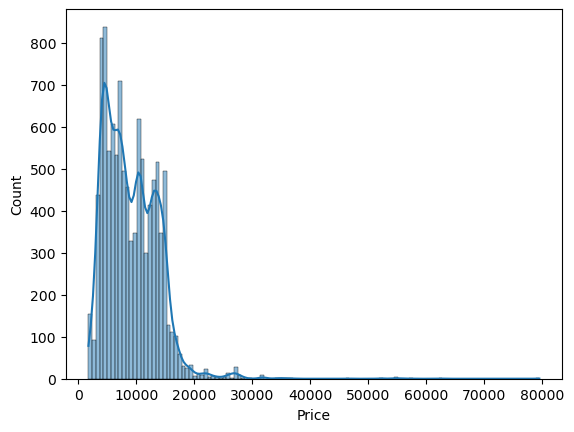

In [4]:
sns.histplot(data= fp, x = 'Price', kde= True)

Observation :-
- The flight prices is right skewed.


###### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
fp['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

min = 1759
<br>max = 79512

###### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

In [6]:
air = fp['Airline'].unique()
len(air)

12

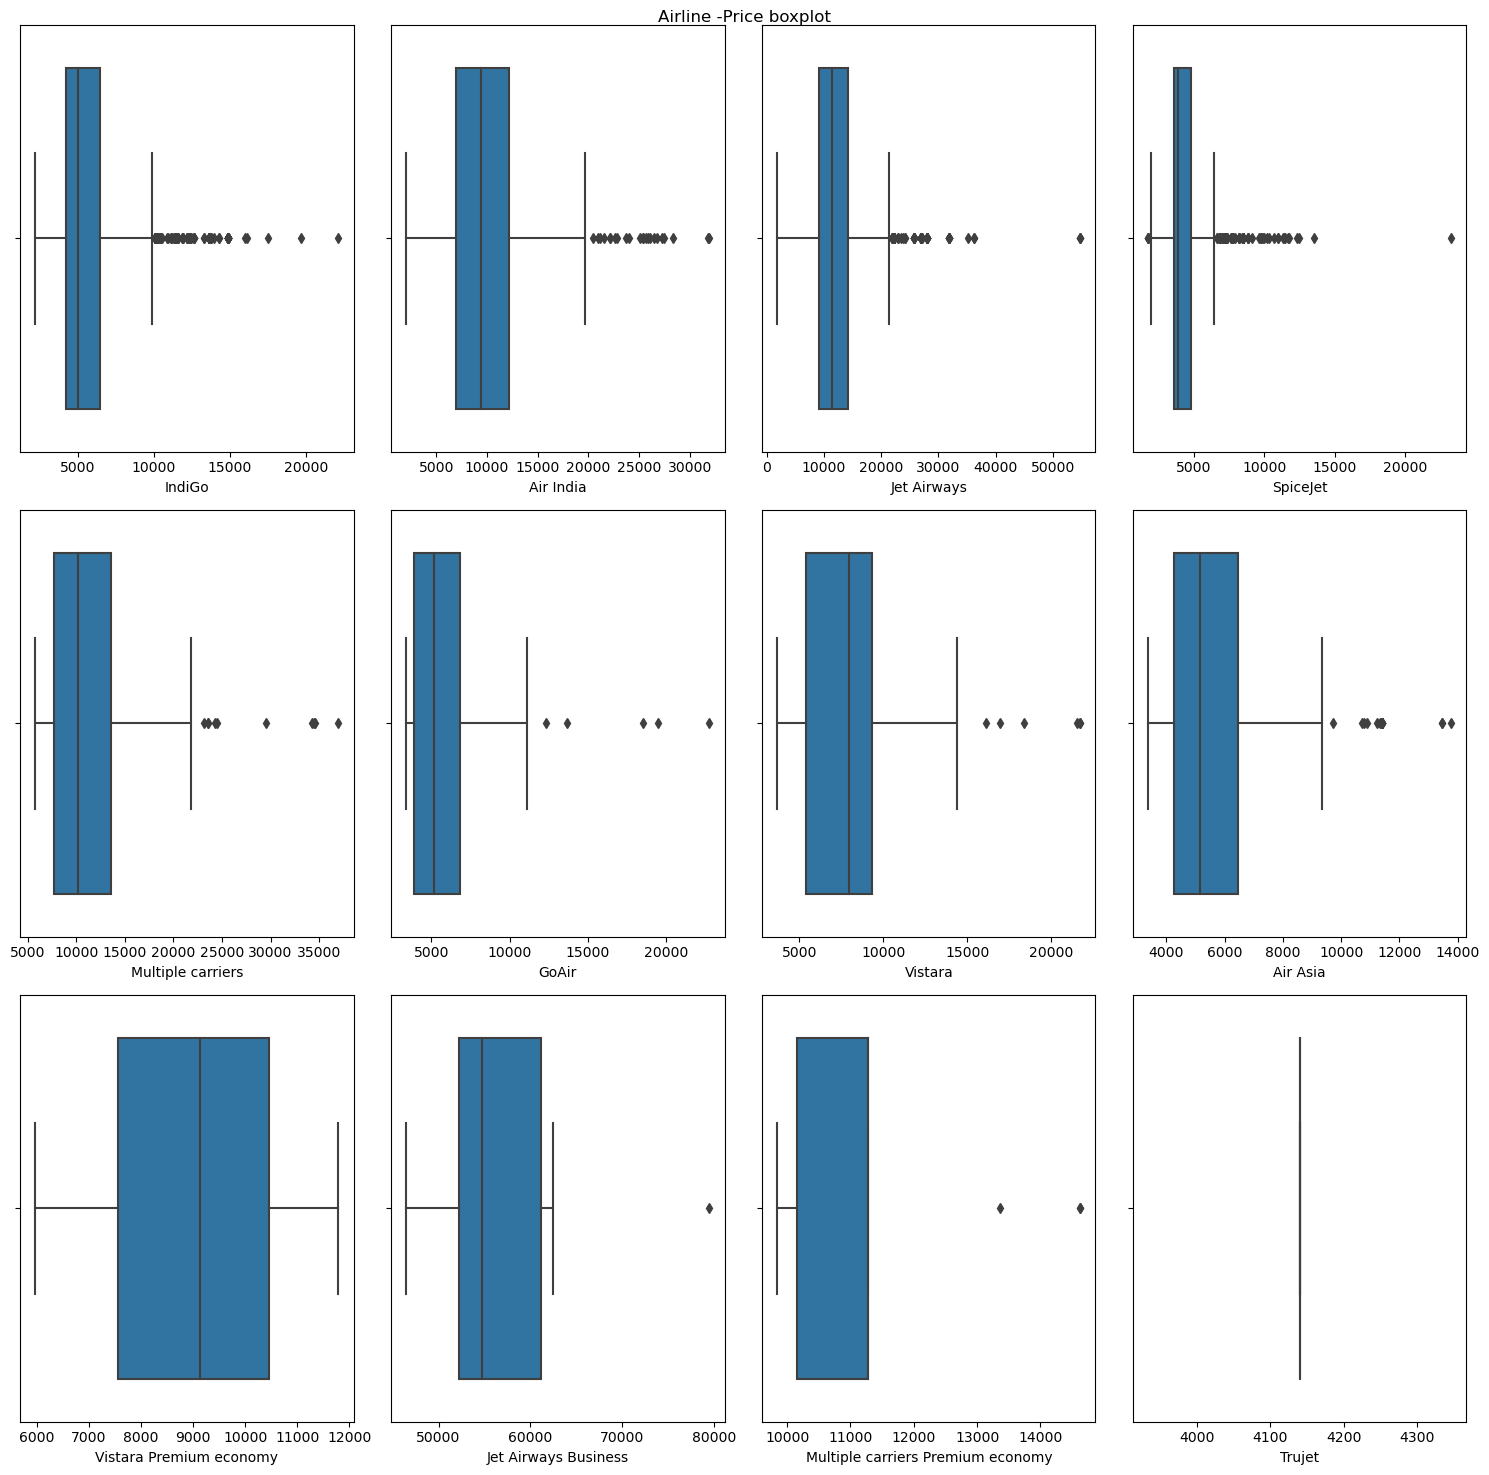

In [7]:
plt.figure(figsize= (15,15))
plt.suptitle('Airline -Price boxplot')

for i in range(len(air)):
    plt.subplot(3,4,i+1)
    data = fp[['Airline', 'Price']][fp['Airline'] == air[i]]
    sns.boxplot(data= data, x = 'Price')
    plt.xlabel(air[i])
    plt.tight_layout()
    

###### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

<Axes: xlabel='Price'>

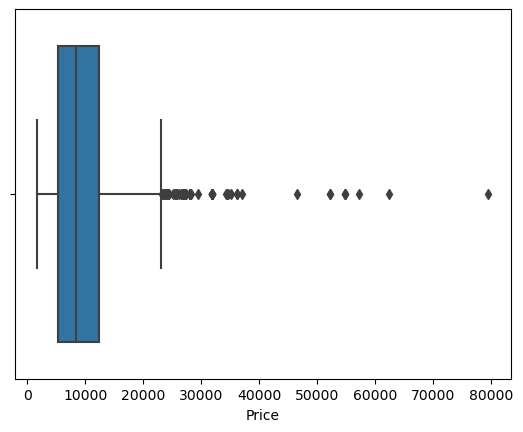

In [8]:
sns.boxplot(data = fp, x = 'Price')

Observation :

- There are outliars in price on the higher price side. It'll shift the model to predict higher price value for a flight.

###### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [9]:
fp['Date']=fp['Date_of_Journey'].str.split('/').str[0].astype(int)
fp['Month']=fp['Date_of_Journey'].str.split('/').str[1].astype(int)
fp['Year']=fp['Date_of_Journey'].str.split('/').str[2].astype(int)

In [10]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [11]:
fp['Month'].unique()

array([3, 5, 6, 4])

<Axes: xlabel='Month', ylabel='Count'>

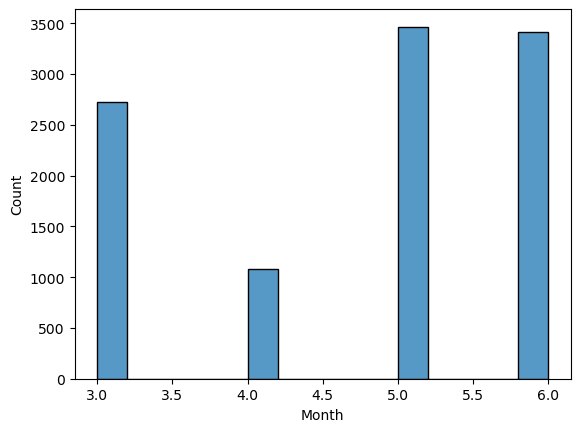

In [12]:
sns.histplot(data = fp, x = 'Month')

peak season is 5th and 6th Month

###### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [13]:
fp.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
fp['Arrival_Time']=fp['Arrival_Time'].apply(lambda x:x.split(' ')[0])
fp['Arrival_hour']=fp['Arrival_Time'].str.split(':').str[0].astype(int)
fp['Arrival_min']=fp['Arrival_Time'].str.split(':').str[1].astype(int)

In [15]:
fp.drop('Arrival_Time',axis=1,inplace=True)

In [16]:
fp['Departure_hour']=fp['Dep_Time'].str.split(':').str[0].astype(int)
fp['Departure_min']=fp['Dep_Time'].str.split(':').str[1].astype(int)
fp.drop('Dep_Time',axis=1,inplace=True)

In [17]:
fp['Total_Stops']=fp['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [18]:
fp.drop('Route',axis=1,inplace=True)

In [19]:
fp['Duration_hour'] = fp['Duration'].str.split(' ').str[0].str[:-1].astype('int')
fp['Duration_min'] = fp['Duration'].str.split(' ').str[1].str[:-1].fillna('0').astype('int')
fp.drop('Duration', axis= 1, inplace=True)

In [20]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10683 non-null  int64 
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Date             10683 non-null  int32 
 7   Month            10683 non-null  int32 
 8   Year             10683 non-null  int32 
 9   Arrival_hour     10683 non-null  int32 
 10  Arrival_min      10683 non-null  int32 
 11  Departure_hour   10683 non-null  int32 
 12  Departure_min    10683 non-null  int32 
 13  Duration_hour    10683 non-null  int32 
 14  Duration_min     10683 non-null  int32 
dtypes: int32(9), int64(2), object(4)
memory usage: 876.5+ KB


In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

ohe.fit_transform(fp[['Airline', 'Source', 'Destination']]).toarray()
enc = pd.DataFrame(ohe.fit_transform(fp[['Airline', 'Source', 'Destination']]).toarray(), columns=ohe.get_feature_names_out())
fp = pd.concat([fp,enc], axis= 1)

In [22]:
fp.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace= True)

In [23]:
fp.drop(['Additional_Info'], axis = 1, inplace= True)

In [24]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10683 non-null  int64  
 1   Price                                      10683 non-null  int64  
 2   Date                                       10683 non-null  int32  
 3   Month                                      10683 non-null  int32  
 4   Year                                       10683 non-null  int32  
 5   Arrival_hour                               10683 non-null  int32  
 6   Arrival_min                                10683 non-null  int32  
 7   Departure_hour                             10683 non-null  int32  
 8   Departure_min                              10683 non-null  int32  
 9   Duration_hour                              10683 non-null  int32  
 10  Duration_min          

In [25]:
plt.figure(figsize=(30,30))
sns.heatmap(fp.corr(), annot= True)

<Axes: >

 Observation:
    
- Total Stops, Duration Hour, Flight with Jet Airways, flight starting from Delhi and flight going to cochin has posotive co relation with Price
- Flight going to delhi, Spicjet Airline,Indigo, Flight going to Hyderabad has negative co relation with Price
    

###### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

- Total Stops, Duration Hour, Flight with Jet Airways, flight starting from Delhi and flight going to cochin has posotive co relation with Price
- Flight going to delhi, Spicjet Airline,Indigo, Flight going to Hyderabad has negative co relation with Price

<Axes: xlabel='Total_Stops', ylabel='Price'>

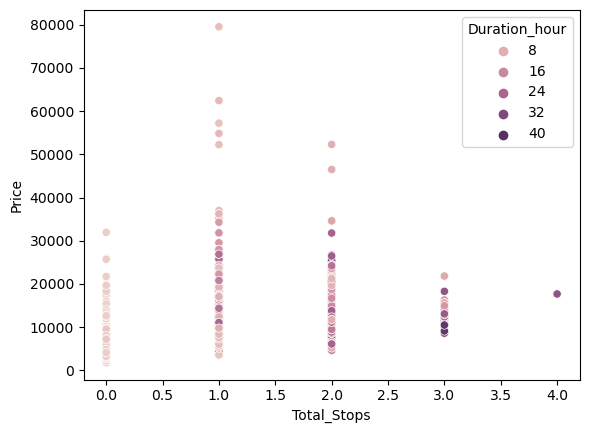

In [26]:
sns.scatterplot(x = fp['Total_Stops'], y = fp['Price'],hue= fp['Duration_hour'])

# Google Playstore:

###### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [27]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
df.shape

(10841, 13)

Row = 10841
<br>Col = 13

###### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [29]:
cat = df['Category'].unique()
cat

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

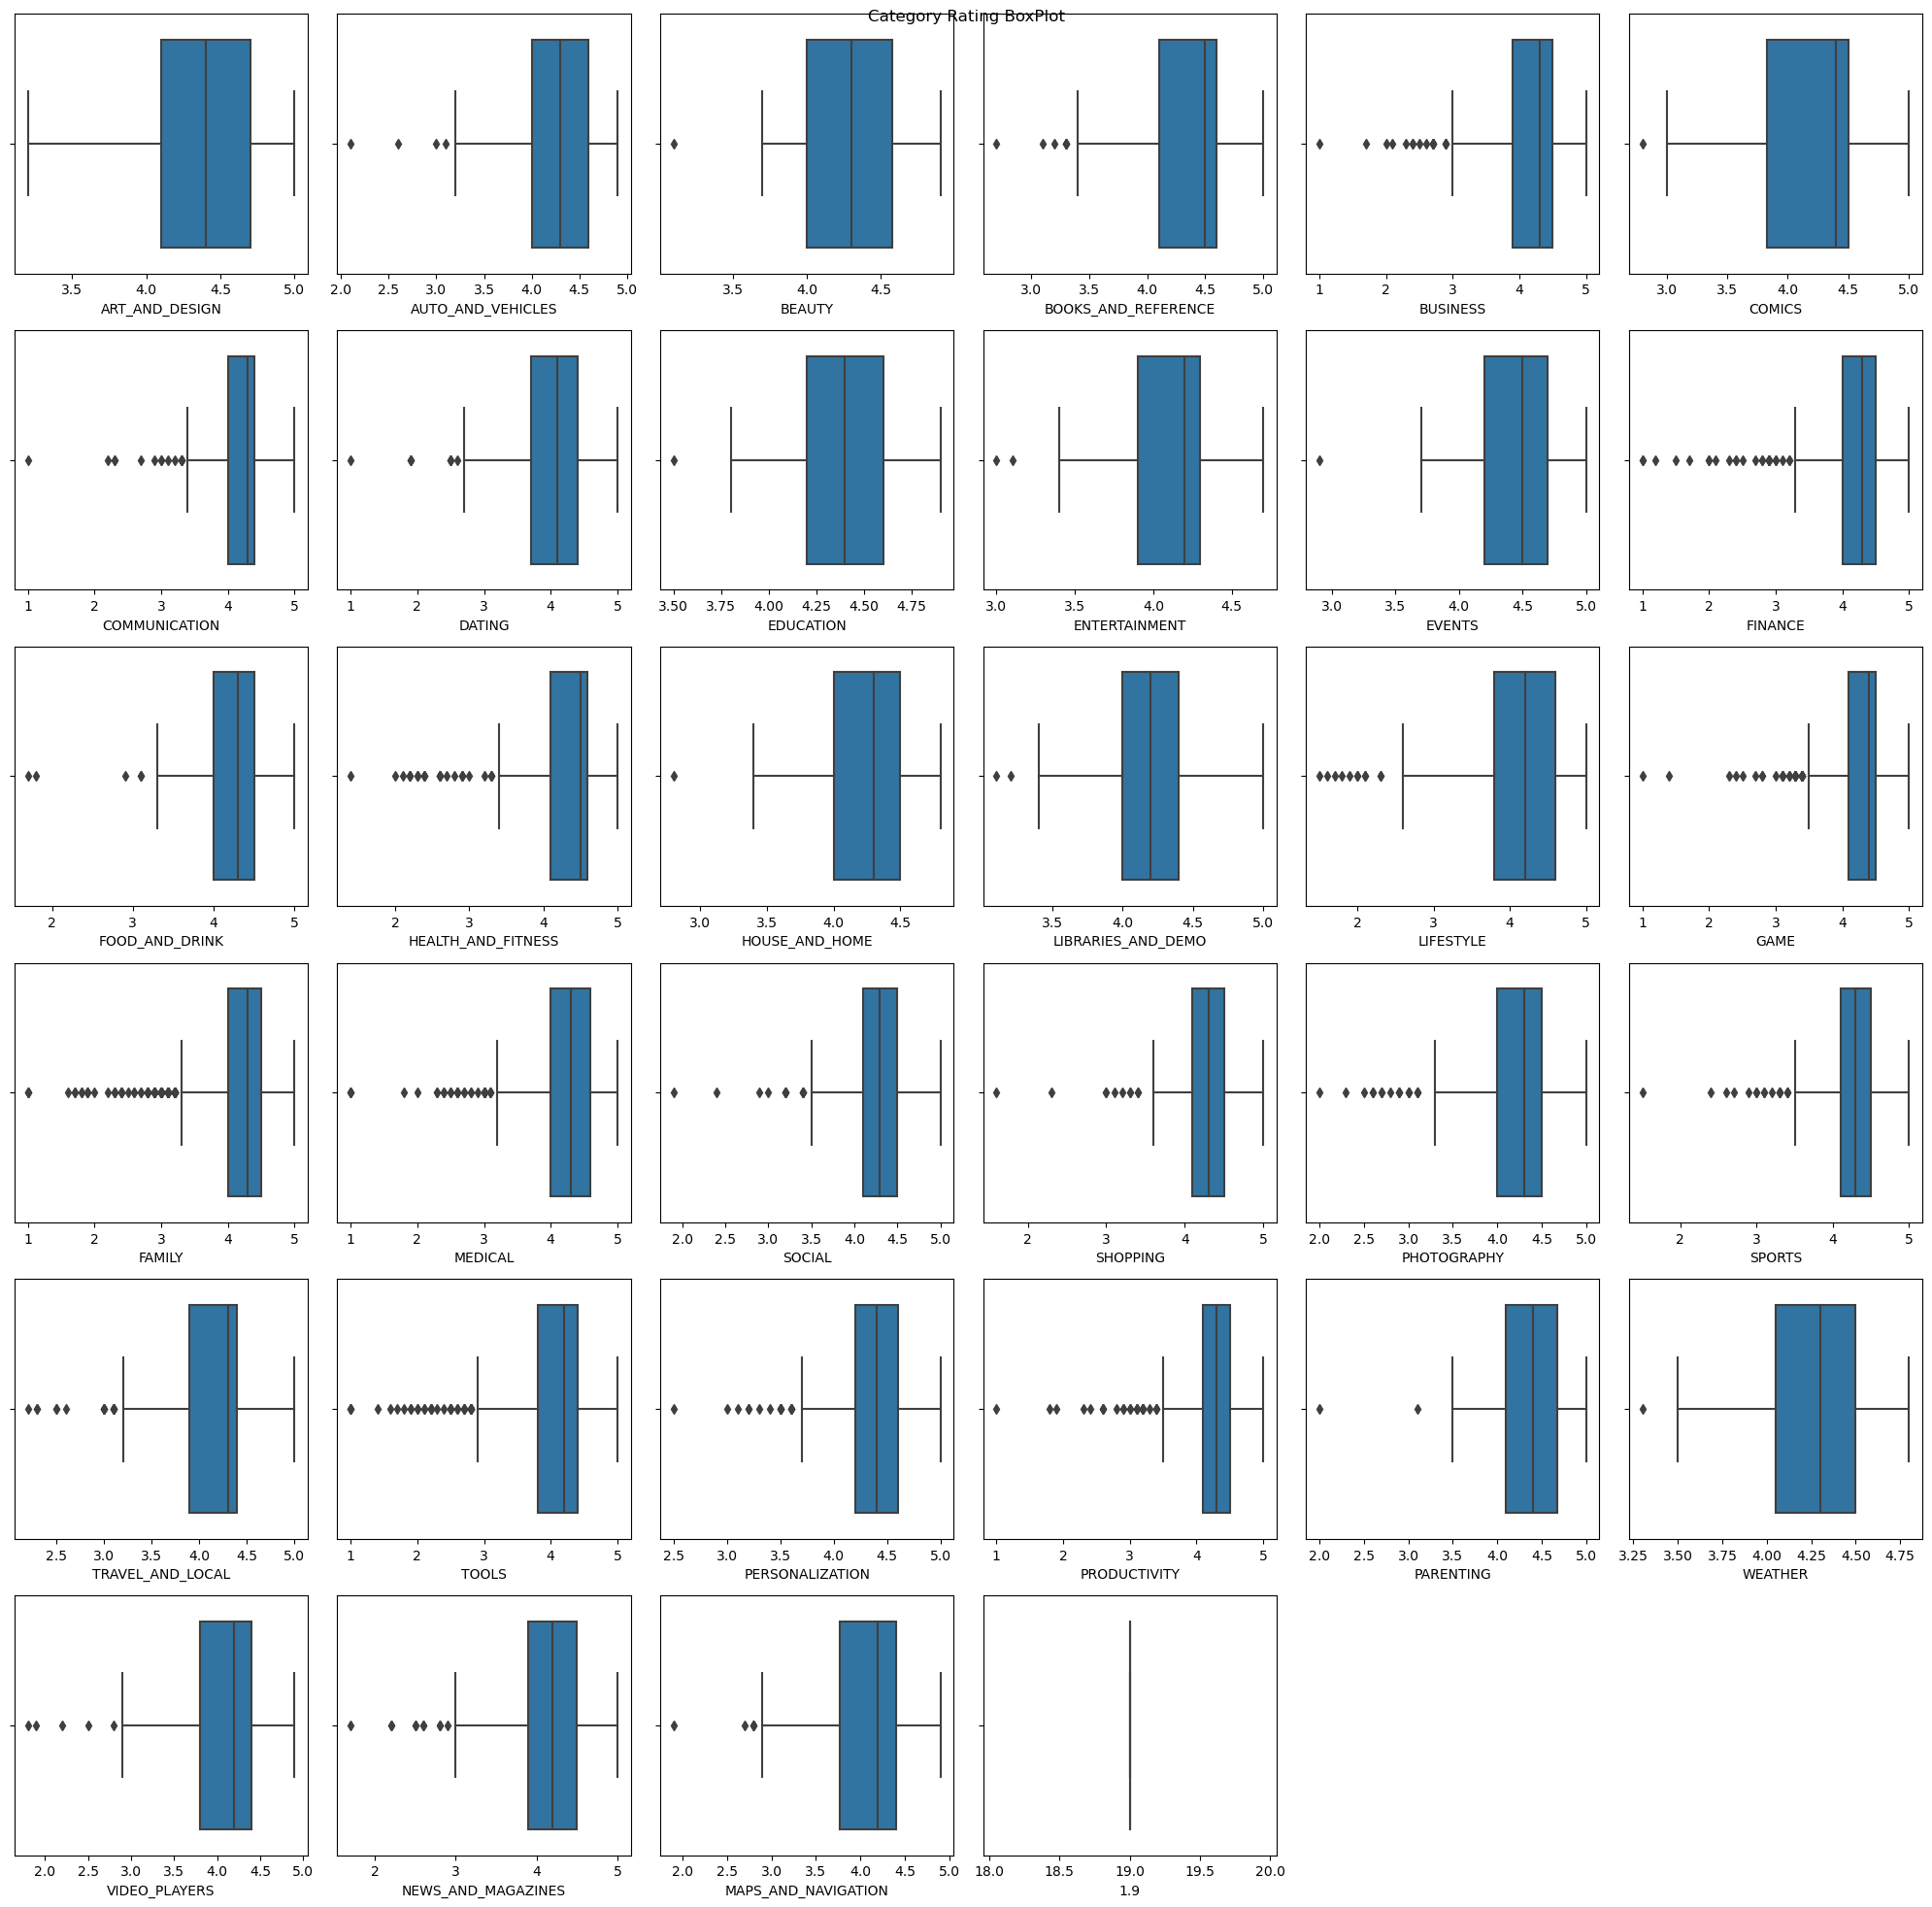

In [30]:
plt.figure(figsize= (20,20))
plt.suptitle('Category Rating BoxPlot')

for i in range(len(cat)):
    plt.subplot(6,6,i+1)
    data = df[['Category', 'Rating']][df['Category'] == cat[i]]
    sns.boxplot(data= data, x = 'Rating')
    plt.xlabel(cat[i])
    plt.tight_layout()

###### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [31]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are missing values on Rating which is one of the main data for this dataset. 

###### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [32]:
df=df.drop(df.index[10472])
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)
df['Size']=df['Size'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [33]:
df['Size'].fillna(df['Size'].mean(), inplace= True)

<Axes: xlabel='Rating', ylabel='Size'>

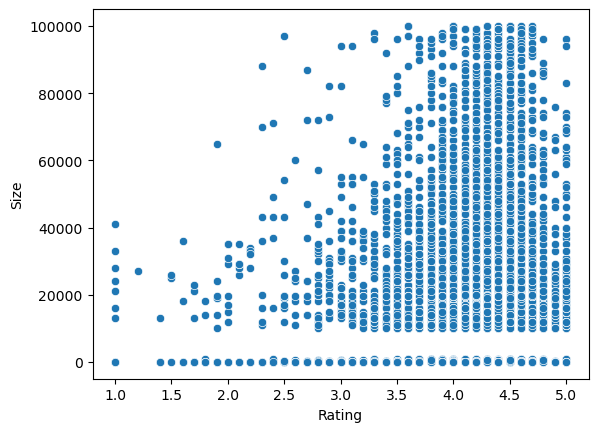

In [34]:
sns.scatterplot(data = df, x = 'Rating', y = 'Size')

Observation:-
- Most of the apps that has size >= 60MB is highly rated

###### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [35]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df[cols]=df[cols].str.replace(item,'')

In [37]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')

In [38]:
data = df[['Type','Price']].groupby(by = 'Type').agg({'Price':'mean'}).reset_index()

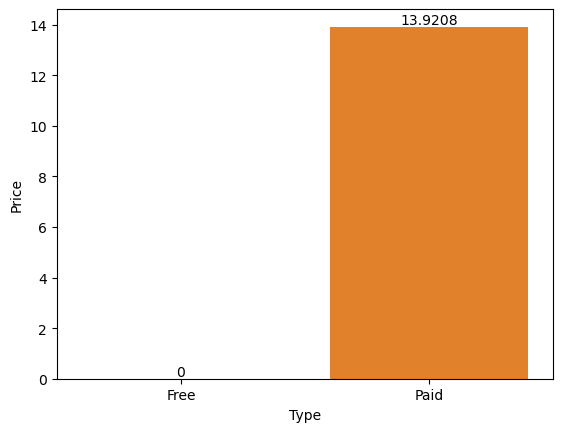

In [39]:
ax = sns.barplot(data = data, x = 'Type', y = 'Price')
for i in ax.containers:
    ax.bar_label(i,)

Observation:-
- Free Version is Free while you have to pay money 13.92 on average in Paid Version

###### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1.1+ MB


In [41]:
df[['App', 'Installs']].groupby('App').agg({'Installs': 'max'}).sort_values(['Installs', 'App'], ascending= False).reset_index().head(10)

,App,Installs
0,YouTube,1000000000
1,WhatsApp Messenger,1000000000
2,Subway Surfers,1000000000
3,Skype - free IM & video calls,1000000000
4,Messenger – Text and Video Chat for Free,1000000000
5,Maps - Navigate & Explore,1000000000
6,Instagram,1000000000
7,Hangouts,1000000000
8,Google+,1000000000
9,Google Street View,1000000000


###### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [42]:
data = df[['Category', 'Installs','Rating']].groupby('Category').agg({'Installs': 'sum', 'Rating':'mean'}).sort_values(['Installs','Rating'], ascending= False).reset_index().head(20)
data

,Category,Installs,Rating
0,GAME,35086024415,4.286326
1,COMMUNICATION,32647276251,4.158537
2,PRODUCTIVITY,14176091369,4.211396
3,SOCIAL,14069867902,4.255598
4,TOOLS,11452771915,4.047411
5,FAMILY,10258263505,4.192272
6,PHOTOGRAPHY,10088247655,4.192114
7,NEWS_AND_MAGAZINES,7496317760,4.132189
8,TRAVEL_AND_LOCAL,6868887146,4.109292
9,VIDEO_PLAYERS,6222002720,4.063750


Above is the list of all highest rated and Most Install category. We can choose one from the Top 10 Categories. 

###### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

From the above data we can see that top apps are made in Games communication product social media and tools. So they are the best app devs.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'GAME'),
  Text(1, 0, 'COMMUNICATION'),
  Text(2, 0, 'PRODUCTIVITY'),
  Text(3, 0, 'SOCIAL'),
  Text(4, 0, 'TOOLS'),
  Text(5, 0, 'FAMILY'),
  Text(6, 0, 'PHOTOGRAPHY'),
  Text(7, 0, 'NEWS_AND_MAGAZINES'),
  Text(8, 0, 'TRAVEL_AND_LOCAL'),
  Text(9, 0, 'VIDEO_PLAYERS'),
  Text(10, 0, 'SHOPPING'),
  Text(11, 0, 'ENTERTAINMENT'),
  Text(12, 0, 'PERSONALIZATION'),
  Text(13, 0, 'BOOKS_AND_REFERENCE'),
  Text(14, 0, 'SPORTS'),
  Text(15, 0, 'HEALTH_AND_FITNESS'),
  Text(16, 0, 'BUSINESS'),
  Text(17, 0, 'FINANCE'),
  Text(18, 0, 'EDUCATION'),
  Text(19, 0, 'MAPS_AND_NAVIGATION')])

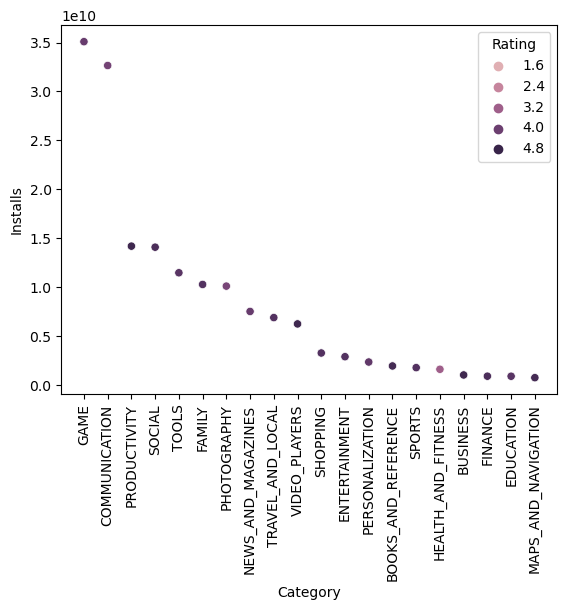

In [43]:
sns.scatterplot(x= data['Category'], y = data['Installs'], hue=df['Rating'])
plt.xticks(rotation=90)

###### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

The dataset dont have any time related data except last updated which is used to update the app not launch date. So the below presented data Month vs Install wil not give a whole picture.

In [44]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])


In [45]:
df['Day'] = df['Last Updated'].dt.day
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  object        
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

<Axes: xlabel='Month', ylabel='Installs'>

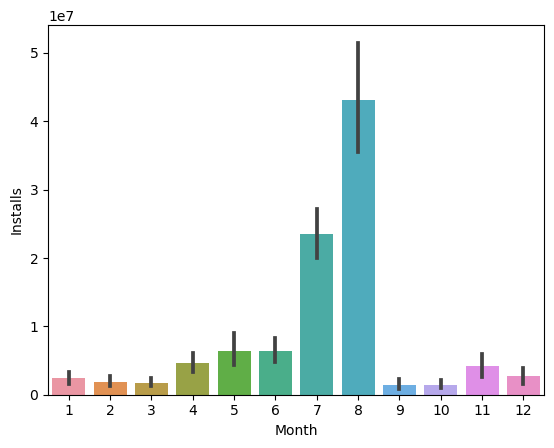

In [47]:
sns.barplot(data = df, x = 'Month', y='Installs')

August is the best month to launch an app.